In [1]:
#导入 pandas 库 
import pandas as pd
# 读取 csv 数据，并保存为名称为 titanic_df 的对象 
titanic_df =pd.read_csv('/mnt/data/train.csv')
# 查看前 5 行 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 查看数据集基本信息 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 直接在 titanic_df 中删掉指定的列：PassengerId,Name,Ticket
titanic_df =titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)
# 查看删除指定列之后的数据前 5 行 
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


##### 原来有12列，删除掉3列，剩下9列。9列除去目标变量Survived，剩下8个特征变量

In [5]:
# 统计频数
Survived_freq = titanic_df.Survived.value_counts()
print(Survived_freq)

0    549
1    342
Name: Survived, dtype: int64


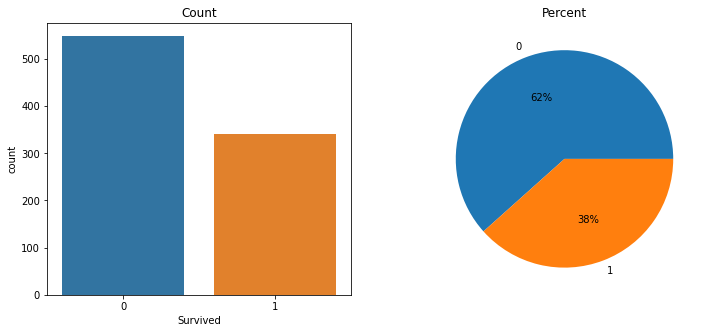

In [6]:
# 生成条图和饼图
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x='Survived', data=titanic_df)
plt.title('Count')
plt.subplot(122)
plt.pie(Survived_freq,labels=Survived_freq.index,
autopct='%1.0f%%')
plt.title('Percent')
plt.show()

In [7]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


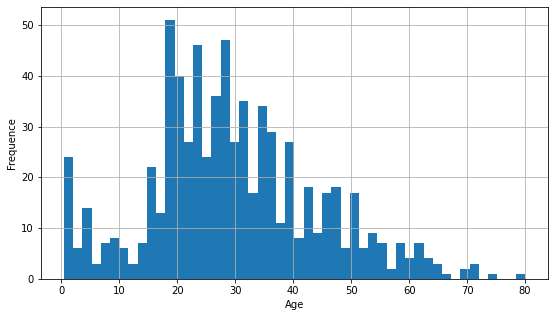

In [8]:
# Age（年龄）直方图分布
plt.figure(figsize=(20,5))
plt.subplot(121)
titanic_df['Age'].hist(bins = 50)
#使用 hist()方法，把 Age 划分为 50 个区间绘图
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

In [9]:
# 对所有数值型变量进行描述统计
titanic_df[["Age","SibSp","Parch","Fare"]].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [10]:
#统计 10%,20%...100%位置的分位数
titanic_df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,Survived,Pclass,Age,SibSp,Parch,Fare
0.1,0.0,1.0,14.0,0.0,0.0,7.5500
0.2,0.0,1.0,19.0,0.0,0.0,7.8542
0.3,0.0,2.0,22.0,0.0,0.0,8.0500
0.4,0.0,2.0,25.0,0.0,0.0,10.5000
0.5,0.0,3.0,28.0,0.0,0.0,14.4542
0.6,0.0,3.0,31.8,0.0,0.0,21.6792
0.7,1.0,3.0,36.0,1.0,0.0,27.0000
0.8,1.0,3.0,41.0,1.0,1.0,39.6875
0.9,1.0,3.0,50.0,1.0,2.0,77.9583
1.0,1.0,3.0,80.0,8.0,6.0,512.3292


In [11]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


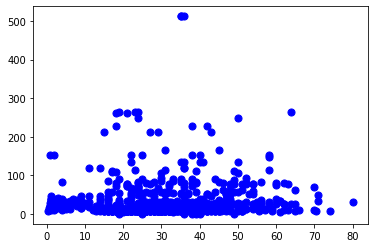

In [12]:
import matplotlib.pyplot as plt
plt.scatter(titanic_df.Age,titanic_df.Fare,50,"blue")
plt.show()

In [13]:
# Survived VS Pclass 交叉表，单元格内显示频数
pd.crosstab(titanic_df.Survived,titanic_df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


#### 从以上交叉表分析中，是否能够明显观察出客舱等级与是否生还之间的关系？

In [14]:
# Survived VS Pclass 交叉表，单元格内显示列百分比（每一列的百分比加总=100%）
pd.crosstab(titanic_df.Survived,titanic_df.Pclass) \
    .apply(lambda r: r/r.sum(), axis=1)

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


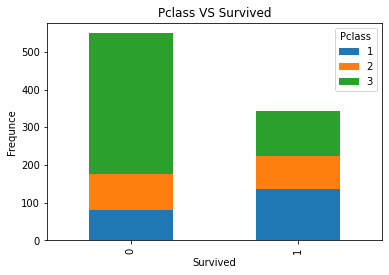

In [15]:
# 使用 crosstab 先生成作图所需的数据，注意去掉了 margins=True,作图的时候不需要显示行列汇总的频数
data = pd.crosstab(titanic_df.Survived,titanic_df.Pclass)
# 绘制堆栈条图
data.plot(kind='bar', stacked=True)
plt.title("Pclass VS Survived")
plt.ylabel('Frequnce')
plt.show()

In [16]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [17]:
# 按 Survived 汇总，求 Age 和 Fare 的均值
titanic_df.groupby('Survived') \
          .agg({'Age':['max','min','mean'],'Fare':['max','min','mean']})

Age                       Fare                
           max   min       mean       max  min       mean
Survived                                                 
0         74.0  1.00  30.626179  263.0000  0.0  22.117887
1         80.0  0.42  28.343690  512.3292  0.0  48.395408

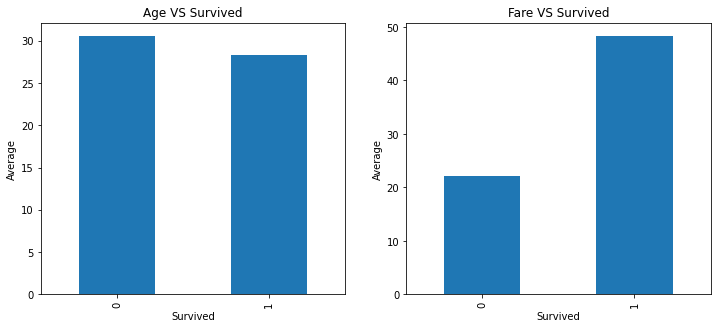

In [18]:
data = titanic_df.groupby('Survived').agg({'Age':'mean','Fare':'mean'})

# 绘制年龄平均值柱状图
plt.figure(figsize = (12,5))
plt.subplot(121)
data.Age.plot(kind='bar')
plt.title("Age VS Survived")
plt.ylabel('Average')

# 绘制船票价格平均值柱状图
plt.subplot(122)
data.Fare.plot(kind='bar')
plt.title("Fare VS Survived")
plt.ylabel('Average')
plt.show()

In [19]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [21]:
# 删除整个数据集中任何一个变量有缺失的记录
dropna = titanic_df.dropna()
dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    float64
 7   Cabin     183 non-null    object 
 8   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [22]:
# 对 Age 变量删除缺失值，保存为一个新的变量
Age_dropna = titanic_df[['Age']].dropna()
Age_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [23]:
# 构造一个新的变量 Age_isna,当 Age 是缺失值的时候 Age_isna=1，否则=0
titanic_df['Age_isna']=0

titanic_df.loc[titanic_df['Age'].isnull(), 'Age_isna'] = 1
# 对 Age_isna 进行频数分析，确认 Age_isna 是否构造正确
titanic_df['Age_isna'].value_counts()

0    714
1    177
Name: Age_isna, dtype: int64

In [24]:
titanic_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
5,0,3,male,NaN,0,0,8.4583,NaN,Q,1
6,0,1,male,54.0,0,0,51.8625,E46,S,0
7,0,3,male,2.0,3,1,21.0750,NaN,S,0
8,1,3,female,27.0,0,2,11.1333,NaN,S,0
9,1,2,female,14.0,1,0,30.0708,NaN,C,0


In [25]:
titanic_df['Age'].mean()

29.69911764705882

In [26]:
# 对年龄缺失值进行均值填充
# round() 四舍五入
age_mean = round(titanic_df['Age'].mean())
# 用平均值对年龄进行填充
titanic_df['Age'].fillna(age_mean, inplace=True)
titanic_df.Age.describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [27]:
titanic_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
5,0,3,male,30.0,0,0,8.4583,NaN,Q,1
6,0,1,male,54.0,0,0,51.8625,E46,S,0
7,0,3,male,2.0,3,1,21.0750,NaN,S,0
8,1,3,female,27.0,0,2,11.1333,NaN,S,0
9,1,2,female,14.0,1,0,30.0708,NaN,C,0


In [28]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [29]:
import pandas as pd
# 把 Pclass 进行独热编码,保存为新的数据对象,名字叫 Pclass_onehot,prefix 参数设置独热编码后的变量名前缀
Pclass_onehot = pd.get_dummies(titanic_df.Pclass,prefix='Pclass')
# 查看前 5 行 
Pclass_onehot.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [30]:
# 对Sex进行独热编码
Sex_onehot = pd.get_dummies(titanic_df.Sex,prefix='Sex')
# 查看前 5 行 
Sex_onehot.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [31]:
# 对Embarked进行独热编码
Embarked_onehot = pd.get_dummies(titanic_df.Embarked,prefix='Embarked')
# 查看前 5 行 
Embarked_onehot.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [32]:
#对 Age 进行自定义分箱
cut_points = [0,18,25,40,60,100]

#定义分箱边界值
titanic_df["Age_bin"] = pd.cut(titanic_df.Age, bins=cut_points)
#分箱后的新变量 Age_bin 继续保存在原始的数据对象 titanic_df 中

In [33]:
# 分箱后的频数分析
# titanic_df["Age_bin"].value_counts().sort_index()
titanic_df["Age_bin"].value_counts().sort_values(ascending=False)

(25, 40]     440
(18, 25]     162
(0, 18]      139
(40, 60]     128
(60, 100]     22
Name: Age_bin, dtype: int64

In [34]:
# 等宽分箱，分箱数为 10
titanic_df["Age_wbin"] = pd.cut(titanic_df.Age,10)
# 分箱后的频数分析
titanic_df["Age_wbin"].value_counts().sort_index()

(0.34, 8.378]        54
(8.378, 16.336]      46
(16.336, 24.294]    177
(24.294, 32.252]    346
(32.252, 40.21]     118
(40.21, 48.168]      70
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: Age_wbin, dtype: int64

In [35]:
# 等宽分箱，每一组的宽度如何计算？
# （年龄的最大值 - 年龄的最小值）/ 分组数量
(titanic_df.Age.max() - titanic_df.Age.min())/10

7.958

In [36]:
# 等深分箱，分箱数为 5
titanic_df["Age_dbin"] = pd.qcut(titanic_df.Age,5)
# 分箱后的频数分析
titanic_df["Age_dbin"].value_counts().sort_index()

(0.419, 20.0]    179
(20.0, 28.0]     183
(28.0, 30.0]     224
(30.0, 38.0]     128
(38.0, 80.0]     177
Name: Age_dbin, dtype: int64

In [37]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]"
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]"
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"


In [38]:
# 分箱后得到的变量就变成了类别型变量（这正是我们要分箱的目的），
# 那么就可以用前面学到的独热编码的方法对分箱后的变量进行编码了。
Age_bin_onehot = pd.get_dummies(titanic_df.Age_bin,prefix='Age_bin')
Age_bin_onehot.head()

,"Age_bin_(0, 18]","Age_bin_(18, 25]","Age_bin_(25, 40]","Age_bin_(40, 60]","Age_bin_(60, 100]"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [39]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]"
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]"
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]"


In [40]:
# 从sklearn中导入数据与处理模块
from sklearn import preprocessing
titanic_df['Age_std'] = preprocessing.scale(titanic_df[['Age']])
# 查看标准化后的数据 
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin,Age_std
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",-0.597055
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.634162
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",-0.289251
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309


In [42]:
titanic_df.Age_std.mean()  # 标准化后年龄的平均值

1.5949331891360272e-16

In [43]:
titanic_df.Age_std.std()

1.0005616400330457

In [44]:
from sklearn import preprocessing
# 实例化一个归一化转换器
minmaxscaler = preprocessing.MinMaxScaler()


# 使用 Age 变量的数据训练一个归一化转换模型
# 学习到年龄的最小值和最大值
minmaxscaler.fit(titanic_df[['Age']])


# Age 归一化处理后保存为原数据对象中的新变量 Age_normal
titanic_df['Age_normal'] = minmaxscaler.transform(titanic_df[['Age']])
# 查看归一化后的数据 
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin,Age_std,Age_normal
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",-0.597055,0.271174
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.634162,0.472229
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",-0.289251,0.321438
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531


In [45]:
titanic_df.Age_normal.min(),titanic_df.Age_normal.max()

(0.0, 1.0)

In [46]:
# 构造 FamilySize 变量
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin,Age_std,Age_normal,FamilySize
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",-0.597055,0.271174,2
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.634162,0.472229,2
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",-0.289251,0.321438,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,2
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,1


In [49]:
# 将FamilySize当做类别型变量分析
titanic_df.FamilySize.value_counts().sort_index()

1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: FamilySize, dtype: int64

In [52]:
# FamilySize 与 Survived 的交叉表，显示频数
pd.crosstab(titanic_df.Survived,
            titanic_df.FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


In [53]:
# 直接观察数值是无法判断出FamilySize与Survived是否有关
# 因此接下来按列进行百分比统计分析

# FamilySize 与 Survived 的交叉表，显示列占比
pd.crosstab(titanic_df.Survived,titanic_df.FamilySize) \
                    .apply(lambda r: r/r.sum(), axis=0)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,0.696462,0.447205,0.421569,0.275862,0.8,0.863636,0.666667,1.0,1.0
1,0.303538,0.552795,0.578431,0.724138,0.2,0.136364,0.333333,0.0,0.0


In [55]:
# 构造一个新变量 IsAlone（是否独自一人)
titanic_df['IsAlone'] = 0

titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

# 频数统计
titanic_df['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [57]:
# 构造一个新变量 IsMother（是否是母亲）
titanic_df['IsMother'] = 0
# 判断是否是母亲的条件 1、女性  2、年龄大于20岁  3、父母或子女数量大于0
titanic_df.loc[(titanic_df['Sex']=='female') & 
               (titanic_df['Parch']>0) & 
               (titanic_df['Age']>20),'IsMother'] = 1
# 频数统计
titanic_df['IsMother'].value_counts()

0    816
1     75
Name: IsMother, dtype: int64

In [58]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_dbin,Age_std,Age_normal,FamilySize,IsAlone,IsMother
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]","(20.0, 28.0]",-0.597055,0.271174,2,0,0
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.634162,0.472229,2,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]","(20.0, 28.0]",-0.289251,0.321438,1,1,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,2,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]","(30.0, 38.0]",0.403309,0.434531,1,1,0


In [60]:
# 思考：性别（Sex）和年龄自定义分箱（Age_bin）组合后有多少种类别别？

# 把 Sex 性别和 Age_bin 特征进行组合
titanic_df['Sex_Age_combo'] = titanic_df['Sex'] + "_" + titanic_df['Age_bin'].astype(str)

In [61]:
# 对 Sex_Age_combo 进行独热编码
Sex_Age_combo_onehot = pd.get_dummies(titanic_df['Sex_Age_combo'], prefix='Sex_Age')
Sex_Age_combo_onehot.head()

,"Sex_Age_female_(0, 18]","Sex_Age_female_(18, 25]","Sex_Age_female_(25, 40]","Sex_Age_female_(40, 60]","Sex_Age_female_(60, 100]","Sex_Age_male_(0, 18]","Sex_Age_male_(18, 25]","Sex_Age_male_(25, 40]","Sex_Age_male_(40, 60]","Sex_Age_male_(60, 100]"
0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
